Midsem Project Evaluation (BaseLine Model) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
torch.cuda.is_available()

True

Data Extraction

In [3]:
df_hindi1 = pd.read_csv("uli_dataset/training/train_hi_l1.csv")
df_hindi2 = pd.read_csv("uli_dataset/training/train_hi_l2.csv")
df_english1 = pd.read_csv("uli_dataset/training/train_en_l1.csv")
df_english2 = pd.read_csv("uli_dataset/training/train_en_l2.csv")
df_tamil1 = pd.read_csv("uli_dataset/training/train_ta_l1.csv")
df_tamil2 = pd.read_csv("uli_dataset/training/train_ta_l2.csv")

In [4]:
df_hindi1_test = pd.read_csv("uli_dataset/testing/test_hi_l1.csv")
df_hindi2_test = pd.read_csv("uli_dataset/testing/test_hi_l2.csv")

In [5]:

df_english1_test = pd.read_csv("uli_dataset/testing/test_en_l1.csv")
df_english2_test = pd.read_csv("uli_dataset/testing/test_en_l2.csv")
df_tamil1_test = pd.read_csv("uli_dataset/testing/test_ta_l1.csv")
df_tamil2_test = pd.read_csv("uli_dataset/testing/test_ta_l2.csv")

In [6]:
df_hindi1_test.head()

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_1,NaN,0.0,0.0,0.0,NaN
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_1,NaN,0.0,0.0,0.0,NaN
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_1,0.0,0.0,0.0,NaN,NaN
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_1,NaN,1.0,1.0,0.0,NaN
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_1,0.0,NaN,1.0,0.0,NaN


In [32]:
def mergeDF(df1, df2):
    arr = df1.columns.values
    hi_dict = {}
    for i in range(len(df1)):
        count1 = 0
        count0 = 0
        for j in range(len(arr)-2):
            if (str(df1[arr[2+j]][i]) == '1.0'):
                count1 += 1
            elif (str(df1[arr[2+j]][i]) == '0.0'):
                count0 += 1
                
        if (count1 > count0):
            hi_dict[df1['text'][i]] = 1
        elif (count0 > count1):
            hi_dict[df1['text'][i]] = 0

    for i in range(len(df2)):
        count1 = 0
        count0 = 0
        for j in range(len(arr)-2):
            if (str(df2[arr[2+j]][i]) == '1.0'):
                count1 += 1
            elif (str(df2[arr[2+j]][i]) == '0.0'):
                count0 += 1
        if (count1 > count0):
            hi_dict[df2['text'][i]] = 1
        elif (count0 > count1 and (df2['text'][i] not in hi_dict)):
            hi_dict[df2['text'][i]] = 0
    df = pd.DataFrame(list(hi_dict.items()), columns=["Text", "Label"])
    return df

In [33]:
df_hindi = mergeDF(df_hindi1,df_hindi2)
df_tamil = mergeDF(df_tamil1,df_tamil2)
df_english = mergeDF(df_english1,df_english2)


In [34]:
df_tamil1_test.head()

,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,question_1,NaN,NaN,0.0,0.0,NaN,0.0
1,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ...,question_1,0.0,NaN,1.0,0.0,NaN,NaN
2,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு ...,question_1,0.0,0.0,0.0,NaN,NaN,NaN
3,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத...,question_1,0.0,NaN,0.0,0.0,0.0,0.0
4,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...,question_1,1.0,0.0,NaN,0.0,NaN,NaN


In [35]:
df_hindi_test = mergeDF(df_hindi1_test,df_hindi2_test)
df_tamil_test = mergeDF(df_tamil1_test,df_tamil2_test)
df_english_test = mergeDF(df_english1_test,df_english2_test)

In [36]:
df_tamil_test.head()

,Text,Label
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,0
1,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ...,1
2,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு ...,0
3,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத...,0
4,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...,0


EDA

In [37]:
df_hindi.head()

,Text,Label
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,1
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,0
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",1


In [38]:
df_english.head()

,Text,Label
0,"This is our history . For Shia and Sunni ,...",0
1,"If this is ""grilling"" then wht wud u call t...",1
2,look at <handle replaced>madam. Locals attac...,0
3,our beloved yogi ji has given money home and...,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",1


In [39]:
df_tamil.head()

,Text,Label
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...,0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...,0
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,0
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆,1
4,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...,1


In [40]:
df_hindi_test.head()

,Text,Label
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,1
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,1
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,1
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,1
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",0


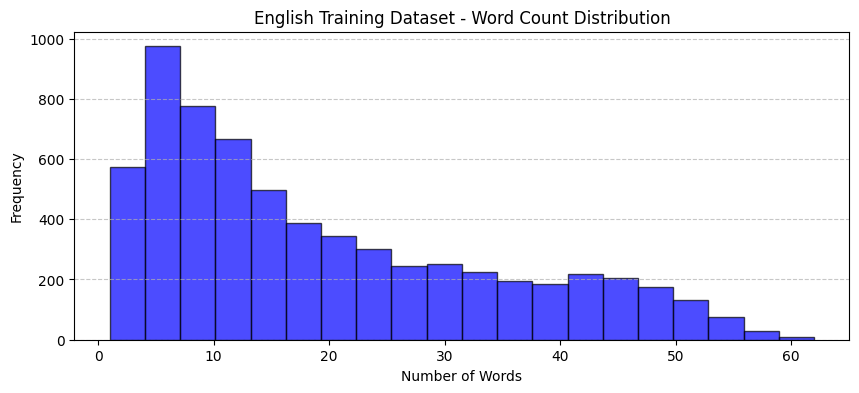

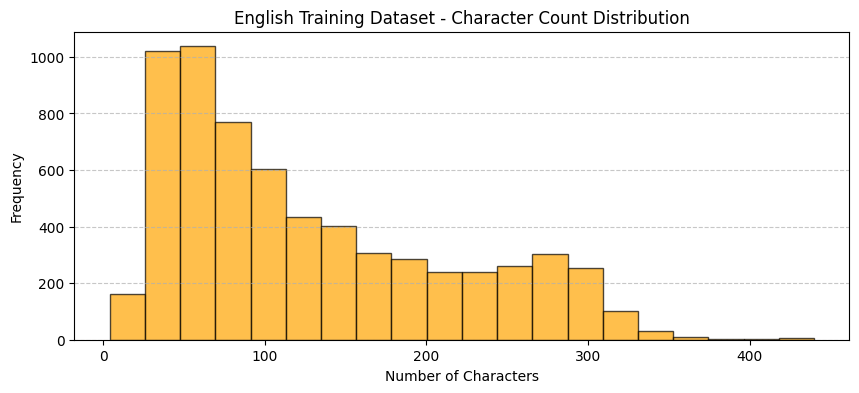

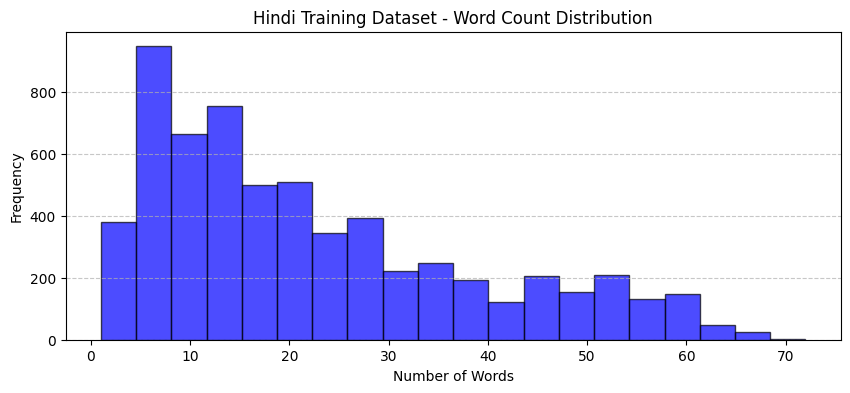

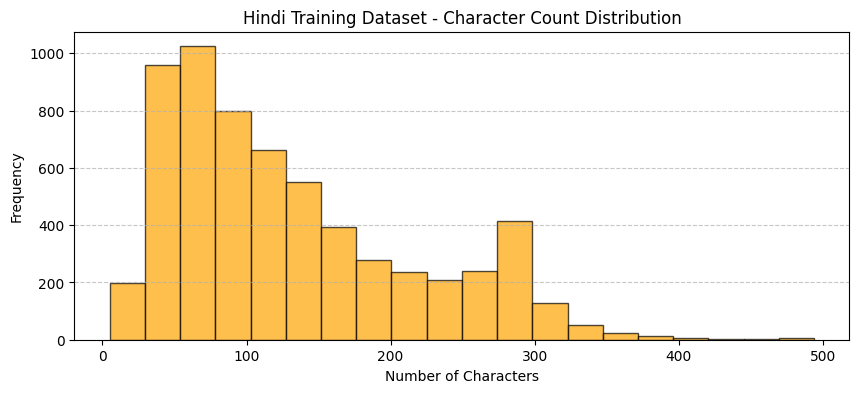

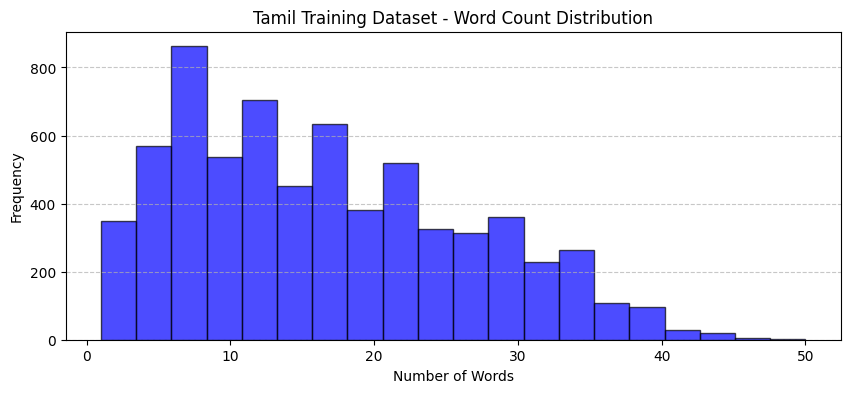

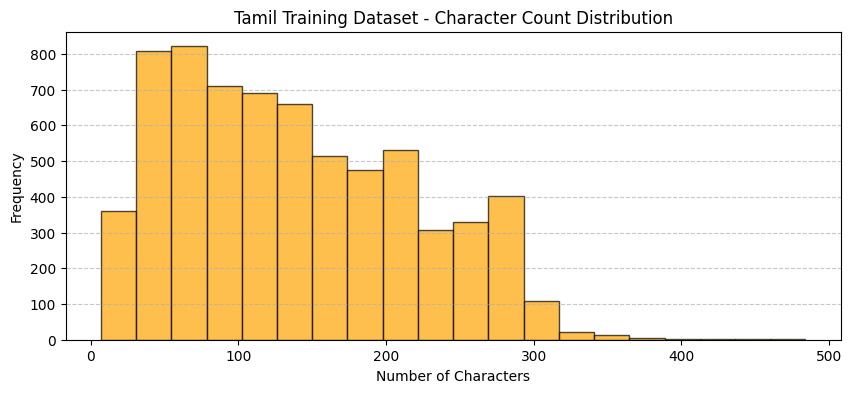

In [41]:
import matplotlib.pyplot as plt

# Define a dictionary with language names and their DataFrames
dfs = {'English': df_english, 'Hindi': df_hindi, 'Tamil': df_tamil}

for lang, df in dfs.items():
    df = df.copy()  # Ensure modifications don't affect the original DataFrame

    # Calculate word and character counts
    df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
    df['char_count'] = df['Text'].apply(lambda x: len(str(x)))

    # Plot Word Count Distribution
    plt.figure(figsize=(10, 4))
    plt.hist(df['word_count'], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"{lang} Training Dataset - Word Count Distribution")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Plot Character Count Distribution
    plt.figure(figsize=(10, 4))
    plt.hist(df['char_count'], bins=20, alpha=0.7, color='orange', edgecolor='black')
    plt.title(f"{lang} Training Dataset - Character Count Distribution")
    plt.xlabel("Number of Characters")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



English Dataset: 6465 samples
Label
0    4443
1    2022
Name: count, dtype: int64

Hindi Dataset: 6195 samples
Label
1    3392
0    2803
Name: count, dtype: int64

Tamil Dataset: 6761 samples
Label
1    3741
0    3020
Name: count, dtype: int64


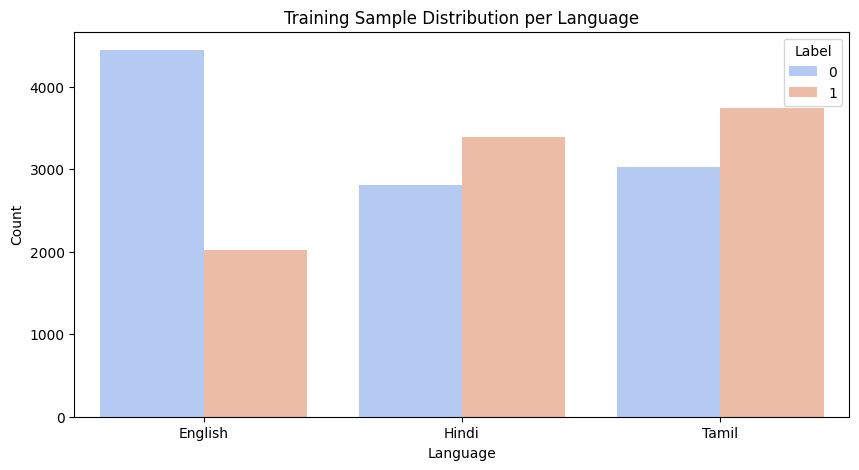

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a dictionary with language names and DataFrames
dfs = {'English': df_english, 'Hindi': df_hindi, 'Tamil': df_tamil}

# Count total samples per language and label distribution
for lang, df in dfs.items():
    print(f"\n{lang} Dataset: {len(df)} samples")
    print(df['Label'].value_counts())

# Concatenating all DataFrames using pd.concat()
df_all = pd.concat([
    df_english.assign(Language='English'),
    df_hindi.assign(Language='Hindi'),
    df_tamil.assign(Language='Tamil')
])

# Plot Label Distribution per Language
plt.figure(figsize=(10, 5))
sns.countplot(x="Language", hue="Label", data=df_all, palette="coolwarm")
plt.title("Training Sample Distribution per Language")
plt.xlabel("Language")
plt.ylabel("Count")
plt.legend(title="Label")
plt.show()


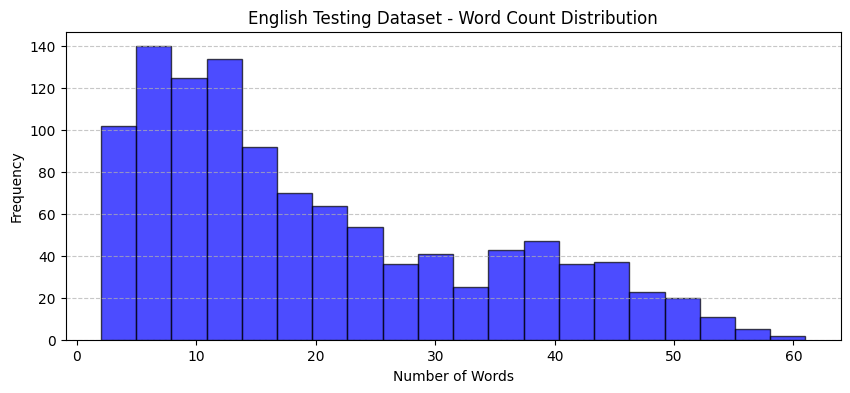

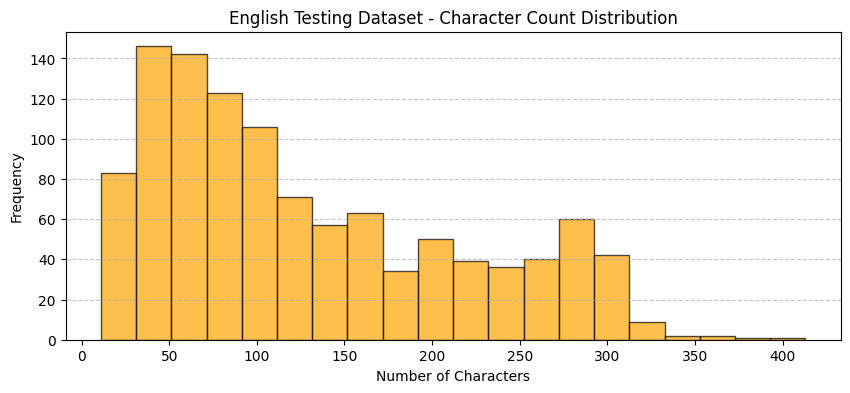

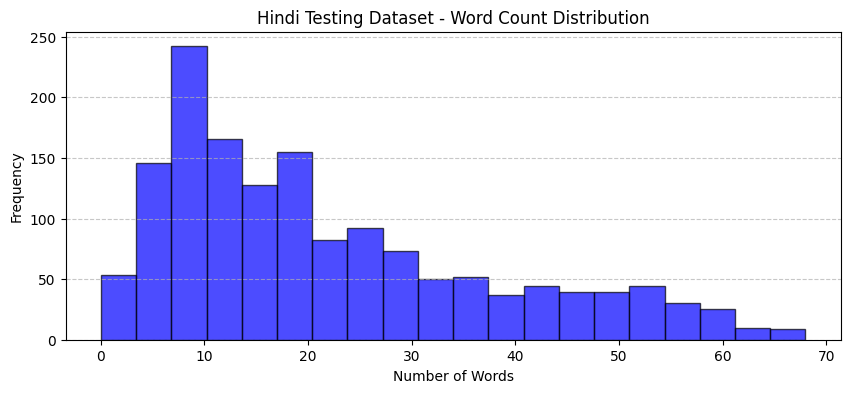

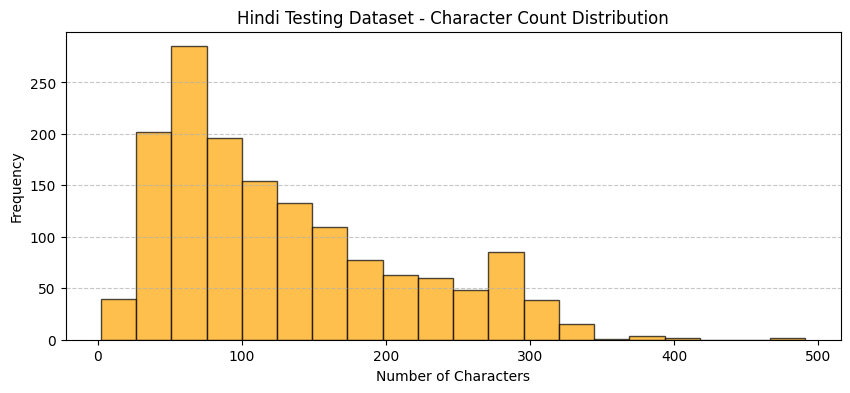

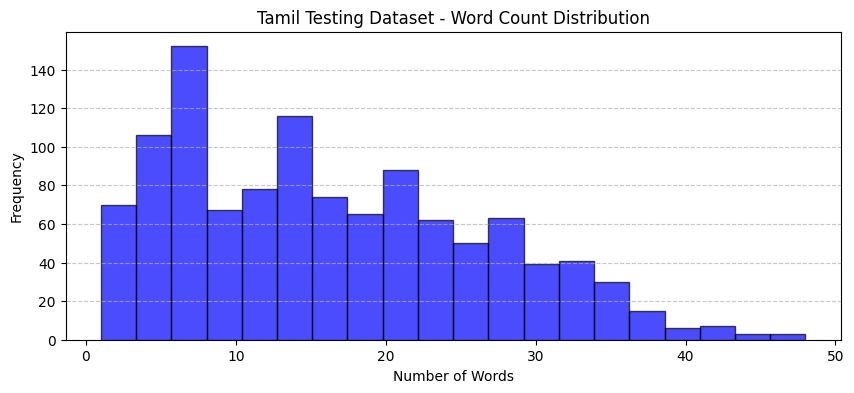

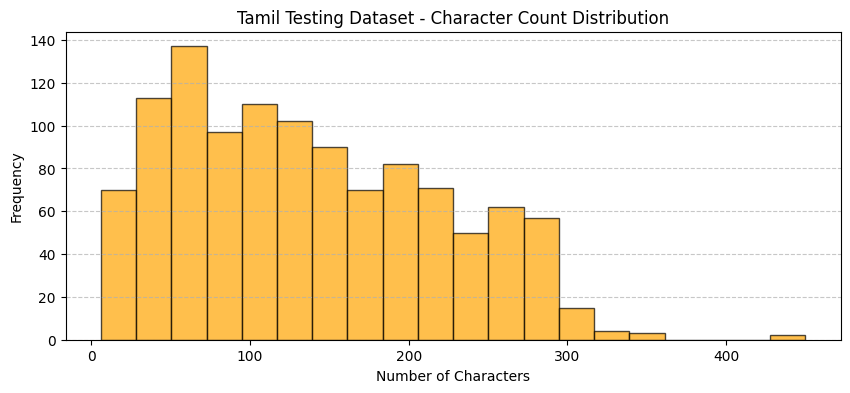

In [43]:
import matplotlib.pyplot as plt

# Define a dictionary with language names and their DataFrames
dfs = {'English': df_english_test, 'Hindi': df_hindi_test, 'Tamil': df_tamil_test}

for lang, df in dfs.items():
    df = df.copy()  # Ensure modifications don't affect the original DataFrame

    # Calculate word and character counts
    df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
    df['char_count'] = df['Text'].apply(lambda x: len(str(x)))

    # Plot Word Count Distribution
    plt.figure(figsize=(10, 4))
    plt.hist(df['word_count'], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"{lang} Testing Dataset - Word Count Distribution")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Plot Character Count Distribution
    plt.figure(figsize=(10, 4))
    plt.hist(df['char_count'], bins=20, alpha=0.7, color='orange', edgecolor='black')
    plt.title(f"{lang} Testing Dataset - Character Count Distribution")
    plt.xlabel("Number of Characters")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



English Dataset: 1107 samples
Label
0    709
1    398
Name: count, dtype: int64

Hindi Dataset: 1516 samples
Label
1    857
0    659
Name: count, dtype: int64

Tamil Dataset: 1135 samples
Label
1    683
0    452
Name: count, dtype: int64


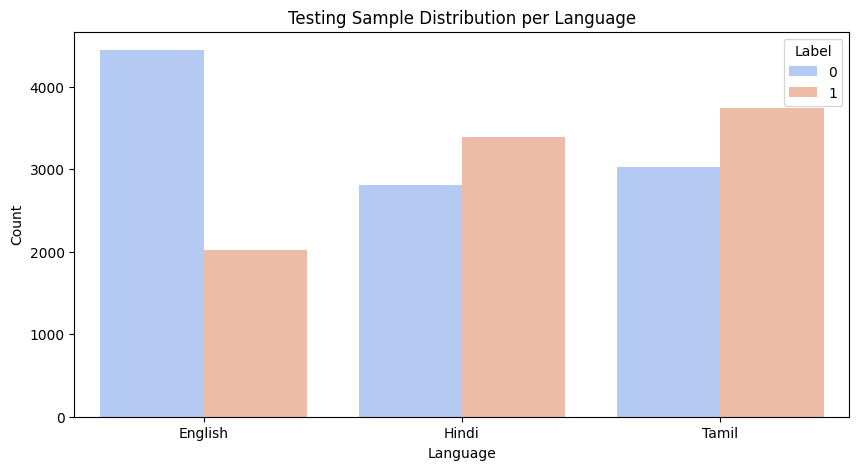

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a dictionary with language names and DataFrames
dfs = {'English': df_english_test, 'Hindi': df_hindi_test, 'Tamil': df_tamil_test}

# Count total samples per language and label distribution
for lang, df in dfs.items():
    print(f"\n{lang} Dataset: {len(df)} samples")
    print(df['Label'].value_counts())

# Concatenating all DataFrames using pd.concat()
df_all = pd.concat([
    df_english.assign(Language='English'),
    df_hindi.assign(Language='Hindi'),
    df_tamil.assign(Language='Tamil')
])

# Plot Label Distribution per Language
plt.figure(figsize=(10, 5))
sns.countplot(x="Language", hue="Label", data=df_all, palette="coolwarm")
plt.title("Testing Sample Distribution per Language")
plt.xlabel("Language")
plt.ylabel("Count")
plt.legend(title="Label")
plt.show()


In [45]:
# Merge all datasets into one
df_all = pd.concat([
    df_english,
    df_hindi,
    df_tamil
])

print(df_all.head(), "\nTotal Samples:", len(df_all))


                                                Text  Label
0      This is our history . For Shia and Sunni ,...      0
1     If this is "grilling" then wht wud u call t...      1
2    look at <handle replaced>madam. Locals attac...      0
3    our beloved yogi ji has given money home and...      1
4  "I gonna kill that bitch"  Bitvj imma kill you...      1 
Total Samples: 19421


In [49]:
# Merge all datasets into one
df_test = pd.concat([
    df_english_test,
    df_hindi_test,
    df_tamil_test
])

print(df_test.head(), "\nTotal Samples:", len(df_test))

                                                Text  Label
0  "who's this tweet about" bitch it's about you ...      0
1  #AlkaLamba should’ve used her slippers to slap...      0
2  #CoronaVillains  #COVIDIDIOT   #COVID2019 is a...      1
3  (Acts 29:19994) LIKE the female "governors" of...      1
4  ***Let us celebrate “secular” as a beautiful w...      0 
Total Samples: 3758


In [50]:
import re
import unicodedata

# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        u"\U0001F700-\U0001F77F"  # Alchemical Symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed Characters
        "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r' ', text)  # Replace emojis with an empty string

# Function to clean text
def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Normalize Unicode characters (important for Hindi & Tamil)
    text = unicodedata.normalize("NFKC", text)

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"https?://\S+|www\.\S+", "", text)

    # Remove emojis
    text = remove_emojis(text)

    # Remove special characters and punctuation
    text = re.sub(r"[^a-zA-Z0-9\u0900-\u097F\u0B80-\u0BFF\s]", "", text)

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    
    return text

# Apply cleaning to the dataset
df_all["Text"] = df_all["Text"].apply(clean_text)

# Show cleaned samples
print(df_all[["Text"]].head(10))


                                                Text
0  this is our history for shia and sunni dont li...
1  if this is grilling then wht wud u call th stu...
2  look at handle replacedmadam locals attacked n...
3  our beloved yogi ji has given money home and f...
4  i gonna kill that bitch bitvj imma kill you we...
5  in america where the genuine englishman no lon...
6  in the earlier decades the rallying cry of the...
7  those who do not learn from history are doomed...
8  blank is blank cultureexperience me literally ...
9                   cannot even burn the effigy lmao


In [51]:
# Apply cleaning to the dataset
df_test["Text"] = df_test["Text"].apply(clean_text)

# Show cleaned samples
print(df_test[["Text"]].head(10))

                                                Text
0  whos this tweet about bitch its about you fuck...
1  alkalamba shouldve used her slippers to slap t...
2  coronavillains covididiot covid2019 is a pande...
3  acts 2919994 like the female governors of stat...
4  let us celebrate secular as a beautiful word t...
5  trigger warning mention of rpe the ultimate go...
6                      16 fuck me like a cheap whore
7  1st handle replaceds actofstupidity then comes...
8  handle replaced handle replaced wanna do a act...
9  handle replaced not many women are accomplishe...


In [52]:
df_train = df_all.copy()
df_test = df_test.copy()

In [53]:
df_train.head(30)

,Text,Label
0,this is our history for shia and sunni dont li...,0
1,if this is grilling then wht wud u call th stu...,1
2,look at handle replacedmadam locals attacked n...,0
3,our beloved yogi ji has given money home and f...,1
4,i gonna kill that bitch bitvj imma kill you we...,1
5,in america where the genuine englishman no lon...,0
6,in the earlier decades the rallying cry of the...,0
7,those who do not learn from history are doomed...,0
8,blank is blank cultureexperience me literally ...,0
9,cannot even burn the effigy lmao,0


In [54]:
df_test.head(30)

,Text,Label
0,whos this tweet about bitch its about you fuck...,0
1,alkalamba shouldve used her slippers to slap t...,0
2,coronavillains covididiot covid2019 is a pande...,1
3,acts 2919994 like the female governors of stat...,1
4,let us celebrate secular as a beautiful word t...,0
5,trigger warning mention of rpe the ultimate go...,0
6,16 fuck me like a cheap whore,1
7,1st handle replaceds actofstupidity then comes...,1
8,handle replaced handle replaced wanna do a act...,0
9,handle replaced not many women are accomplishe...,0
